<h1>Sentiment Analysis on Airbnb Reviews</h1>

In [35]:
# packages used
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import datetime
import string
import re
import unidecode

<h2>Clean dataset and merge csv</h2>

In [4]:
# clean review dataset
df_review = pd.read_csv('/Users/jiahehou/Downloads/detail_review.csv', encoding = "ISO-8859-1")
df_review['date'] = df_review['date'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d'))
df_review['year'] = df_review['date'].apply(lambda x:int(datetime.datetime.strftime(x,'%Y')))
df_review = df_review[['listing_id', 'date', 'comments', 'year']]
df_review = df_review[df_review['year'] == 2018]
df_review

,listing_id,date,comments,year
196,2515,2018-01-09,Felt like coming home.Thank you so much!!!,2018
197,2515,2018-01-15,Misiâs place is very close to Central Park. ...,2018
198,2515,2018-01-22,Mizi's place is GREAT! She and her family are ...,2018
199,2515,2018-02-11,é§ ãè¿ãéå¸¸ã«å¿«é©ï½¡å¤ãæ¯è¼çå...,2018
200,2515,2018-02-18,"Appartement TRES bien situÃ© (lignes 2,3, B......",2018
201,2515,2018-03-15,"GroÃartige Lage, man ist praktisch in 5 Minut...",2018
202,2515,2018-03-21,Meine Schwester und ich haben im MÃ¤rz 2018 fÃ...,2018
203,2515,2018-05-04,Close enough to public transport and within a ...,2018
204,2515,2018-05-22,"Nous avons passÃ© 6 jours chez StÃ©phanie, qui...",2018
205,2515,2018-07-05,Our room was large and spacious. The bunk bed ...,2018


In [5]:
# clean listing dataset
df_listing = pd.read_csv('/Users/jiahehou/Downloads/listings.csv', encoding = "ISO-8859-1")
df_listing = df_listing[df_listing['neighbourhood_group_cleansed']=='Manhattan']
df_listing = df_listing[['neighbourhood_cleansed', 'id', 'host_name', 'number_of_reviews',
                         'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness']]
df_listing

/Users/jiahehou/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (43,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,neighbourhood_cleansed,id,host_name,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness
1,Harlem,2515,Steph,174,93.0,9.0,9.0
3,Midtown,2595,Jennifer,38,95.0,9.0,9.0
7,Harlem,3647,Elisabeth,0,NaN,NaN,NaN
10,East Harlem,5022,Laura,8,95.0,10.0,9.0
11,Hell's Kitchen,16421,Mark,189,89.0,9.0,9.0
13,East Village,16580,Reka,279,95.0,10.0,9.0
15,East Village,16821,Casey,91,93.0,9.0,9.0
16,Murray Hill,5099,Chris,67,88.0,9.0,9.0
18,Murray Hill,16885,Seamless,1,80.0,6.0,10.0
19,East Harlem,16974,Robin,163,96.0,10.0,9.0


In [6]:
# define district
def district(neigh):
    if neigh in {'Harlem','East Harlem','Inwood','Washington Heights','Morningside Heights','Marble Hill'}:
        return 'Upper Manhattan'
    elif neigh in {'Upper West Side'}:
        return 'Upper West Manhattan'
    elif neigh in {'Upper East Side','Roosevelt Island'}:
        return 'Upper East Manhattan'
    elif neigh in {"Hell's Kitchen",'Chelsea','Theater District'}:
        return 'Mid West Manhattan'
    elif neigh in {'Midtown','Flatiron District'}:
        return 'Mid Manhattan'
    elif neigh in {'Murray Hill','Kips Bay','Gramercy','Stuyvesant Town'}:
        return 'Mid East Manhattan'
    else:
        return 'Lower Manhattan'

In [7]:
df_listing['district'] = df_listing['neighbourhood_cleansed'].map(lambda x:district(x))

In [8]:
df_listing.rename(columns={'id': 'listing_id'}, inplace = True)

In [11]:
# merge two dataframe along listing_id
result = pd.merge(df_listing, df_review, on = 'listing_id')
result = result.dropna(subset=['comments'])
result

,neighbourhood_cleansed,listing_id,host_name,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,district,date,comments,year
0,Harlem,2515,Steph,174,93.0,9.0,9.0,Upper Manhattan,2018-01-09,Felt like coming home.Thank you so much!!!,2018
1,Harlem,2515,Steph,174,93.0,9.0,9.0,Upper Manhattan,2018-01-15,Misiâs place is very close to Central Park. ...,2018
2,Harlem,2515,Steph,174,93.0,9.0,9.0,Upper Manhattan,2018-01-22,Mizi's place is GREAT! She and her family are ...,2018
3,Harlem,2515,Steph,174,93.0,9.0,9.0,Upper Manhattan,2018-02-11,é§ ãè¿ãéå¸¸ã«å¿«é©ï½¡å¤ãæ¯è¼çå...,2018
4,Harlem,2515,Steph,174,93.0,9.0,9.0,Upper Manhattan,2018-02-18,"Appartement TRES bien situÃ© (lignes 2,3, B......",2018
5,Harlem,2515,Steph,174,93.0,9.0,9.0,Upper Manhattan,2018-03-15,"GroÃartige Lage, man ist praktisch in 5 Minut...",2018
6,Harlem,2515,Steph,174,93.0,9.0,9.0,Upper Manhattan,2018-03-21,Meine Schwester und ich haben im MÃ¤rz 2018 fÃ...,2018
7,Harlem,2515,Steph,174,93.0,9.0,9.0,Upper Manhattan,2018-05-04,Close enough to public transport and within a ...,2018
8,Harlem,2515,Steph,174,93.0,9.0,9.0,Upper Manhattan,2018-05-22,"Nous avons passÃ© 6 jours chez StÃ©phanie, qui...",2018
9,Harlem,2515,Steph,174,93.0,9.0,9.0,Upper Manhattan,2018-07-05,Our room was large and spacious. The bunk bed ...,2018


<h2>Define functions for sentiment analysis</h2>

In [97]:
def get_nrc_data():
    nrc = "/Users/jiahehou/Downloads/data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
    count = 0
    emotion_dict =dict()
    with open(nrc,'r') as f:
        all_lines = list()
        for line in f:
            if count < 46:
                count += 1
                continue
            line = line.strip().split('\t')
            if int(line[2]) == 1:
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1])
                else:
                    emotion_dict[line[0]] = [line[1]]
    return emotion_dict
emotion_dict = get_nrc_data()

In [98]:
def emotion_analyzer(text, emotion_dict=emotion_dict):
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    total_words = len(text)
    for word in text:
        if emotion_dict.get(word):
            for emotion in emotion_dict.get(word):
                emotion_count[emotion] += 1/len(text)
    return emotion_count

In [99]:
# define a function to clean comments 
def clean(text):
    unaccented_string = unidecode.unidecode(text)
    # strip to word list
    words = re.split(r'\W+', unaccented_string)
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
    # convert to lower case
    words = [word.lower() for word in words]
    # delete stop words
    stop_words = stopwords.words('english')
    words = [w for w in words if not w in stop_words]
    return words

<h2>Prepare comment texts for each district</h2>

In [100]:
# combine the comments with respect to districts
# upper Manhattan
upper_M = str()
for comment in result.loc[(result['district'] == 'Upper Manhattan'), 'comments']:
    upper_M += str(comment)
upper_m_list = clean(upper_M)
    
# upper west
upper_W = str()
for comment in result.loc[(result['district'] == 'Upper West Manhattan'), 'comments']:
    upper_W += str(comment)
upper_w_list = clean(upper_W)

# upper east
upper_E = str()
for comment in result.loc[(result['district'] == 'Upper East Manhattan'), 'comments']:
    upper_E += str(comment)
upper_e_list = clean(upper_E)

# mid west
mid_W = str()
for comment in result.loc[(result['district'] == 'Mid West Manhattan'), 'comments']:
    mid_W += str(comment)
mid_w_list = clean(mid_W)

# mid Manhattan
mid_M = str()
for comment in result.loc[(result['district'] == 'Mid Manhattan'), 'comments']:
    mid_M += str(comment)
mid_m_list = clean(mid_M)

# mid east
mid_E = str()
for comment in result.loc[(result['district'] == 'Mid East Manhattan'), 'comments']:
    mid_E += str(comment)
mid_e_list = clean(mid_E)

# lower
lower_M = str()
for comment in result.loc[(result['district'] == 'Lower Manhattan'), 'comments']:
    lower_M += str(comment)
lower_m_list = clean(lower_M)

In [101]:
result_list = []
result_list.append(emotion_analyzer(upper_m_list))
result_list.append(emotion_analyzer(upper_w_list))
result_list.append(emotion_analyzer(upper_e_list))
result_list.append(emotion_analyzer(mid_w_list))
result_list.append(emotion_analyzer(mid_m_list))
result_list.append(emotion_analyzer(mid_e_list))
result_list.append(emotion_analyzer(lower_m_list))
result_list

[{'sadness': 0.011801380703776386,
  'joy': 0.048379439497419595,
  'anticipation': 0.03778900754788877,
  'disgust': 0.003798749945377522,
  'negative': 0.01583787655137417,
  'positive': 0.09012495361752278,
  'anger': 0.0046082710392160095,
  'trust': 0.058721015923134605,
  'fear': 0.006896853088585566,
  'surprise': 0.016775528614318656},
 {'sadness': 0.013925419044221858,
  'joy': 0.051898515513571775,
  'anticipation': 0.04202980117690429,
  'disgust': 0.00388953281027094,
  'negative': 0.016901078815977116,
  'positive': 0.09860634361621864,
  'anger': 0.004722606098430664,
  'trust': 0.06399340228247645,
  'fear': 0.006424973252496186,
  'surprise': 0.019302781740372196},
 {'sadness': 0.012899581344393656,
  'joy': 0.04692513107439893,
  'anticipation': 0.03829035918302645,
  'disgust': 0.003746380780968833,
  'negative': 0.017308670474998775,
  'positive': 0.08927977541278458,
  'anger': 0.004785683543313356,
  'trust': 0.05934296502070011,
  'fear': 0.0066955552077629385,
  

<h2>Result and analysis</h2>

In [102]:
# construct dataframe for sentiment analysis above
combined_dict = {}
for key in result_list[0].keys():
    combined_dict[key] = list(item[key] for item in result_list)
df_sentiment = pd.DataFrame(combined_dict, columns = ['trust', 'sadness', 'fear', 'positive', 'negative',
                                                  'surprise', 'anger', 'joy', 'disgust', 'anticipation'])
df_sentiment['district'] = ['Upper Manhattan', 'Upper West Manhattan', 'Upper East Manhattan',
                         'Mid West Manhattan', 'Mid Manhattan', 'Mid East Manhattan', 'Lower Manhattan']
df_sentiment.set_index('district', inplace = True)
df_sentiment

,trust,sadness,fear,positive,negative,surprise,anger,joy,disgust,anticipation
district,,,,,,,,,,
Upper Manhattan,0.058721,0.011801,0.006897,0.090125,0.015838,0.016776,0.004608,0.048379,0.003799,0.037789
Upper West Manhattan,0.063993,0.013925,0.006425,0.098606,0.016901,0.019303,0.004723,0.051899,0.003890,0.042030
Upper East Manhattan,0.059343,0.012900,0.006696,0.089280,0.017309,0.017167,0.004786,0.046925,0.003746,0.038290
Mid West Manhattan,0.060859,0.012948,0.007191,0.090952,0.019913,0.016353,0.006052,0.047163,0.004608,0.039081
Mid Manhattan,0.059876,0.011517,0.006851,0.089866,0.019581,0.016739,0.005700,0.045972,0.004186,0.037590
Mid East Manhattan,0.062118,0.012879,0.006884,0.094049,0.018978,0.017758,0.005243,0.047456,0.004139,0.039704
Lower Manhattan,0.064512,0.014041,0.006829,0.098278,0.020247,0.018649,0.005326,0.051032,0.004126,0.042519


In [125]:
df_sentiment.sort_values(by = "joy",ascending = False)
df_sentiment["All_Pos"] = (df_sentiment['trust'] + df_sentiment['positive'] + 
                           df_sentiment['joy'] + df_sentiment['anticipation'] +
                           df_sentiment['surprise'])
df_sentiment["All_Neg"] = (df_sentiment['fear'] + df_sentiment['negative'] + 
                           df_sentiment['disgust'] + df_sentiment['sadness'] +
                           df_sentiment['anger'])
df_sentiment['Net'] = df_sentiment["All_Pos"] - df_sentiment["All_Neg"]
df_sentiment.sort_values(by = "Net",ascending = False)

,trust,sadness,fear,positive,negative,surprise,anger,joy,disgust,anticipation,All_Pos,All_Neg,Net
district,,,,,,,,,,,,,
Upper West Manhattan,0.063993,0.013925,0.006425,0.098606,0.016901,0.019303,0.004723,0.051899,0.003890,0.042030,0.275831,0.045864,0.229967
Lower Manhattan,0.064512,0.014041,0.006829,0.098278,0.020247,0.018649,0.005326,0.051032,0.004126,0.042519,0.274991,0.050569,0.224422
Mid East Manhattan,0.062118,0.012879,0.006884,0.094049,0.018978,0.017758,0.005243,0.047456,0.004139,0.039704,0.261085,0.048122,0.212963
Upper Manhattan,0.058721,0.011801,0.006897,0.090125,0.015838,0.016776,0.004608,0.048379,0.003799,0.037789,0.251790,0.042943,0.208847
Upper East Manhattan,0.059343,0.012900,0.006696,0.089280,0.017309,0.017167,0.004786,0.046925,0.003746,0.038290,0.251005,0.045436,0.205569
Mid West Manhattan,0.060859,0.012948,0.007191,0.090952,0.019913,0.016353,0.006052,0.047163,0.004608,0.039081,0.254409,0.050712,0.203697
Mid Manhattan,0.059876,0.011517,0.006851,0.089866,0.019581,0.016739,0.005700,0.045972,0.004186,0.037590,0.250043,0.047834,0.202208


<li>From the above table, people are most satisfied with Upper West Manhattan and relatively least satisfied with Mid Manhattan. 

<h2>Word cloud</h2>

In [103]:
name_list = []
for name in df_listing['host_name']:
    name_list.append(str(name).lower())

In [145]:
# use only the first 20000 words for each text because of running time issue
texts = []
texts.append(upper_m_list[:20000])
texts.append(upper_e_list[:20000])
texts.append(upper_w_list[:20000])
texts.append(mid_e_list[:20000])
texts.append(mid_m_list[:20000])
texts.append(mid_w_list[:20000])
texts.append(lower_m_list[:20000])

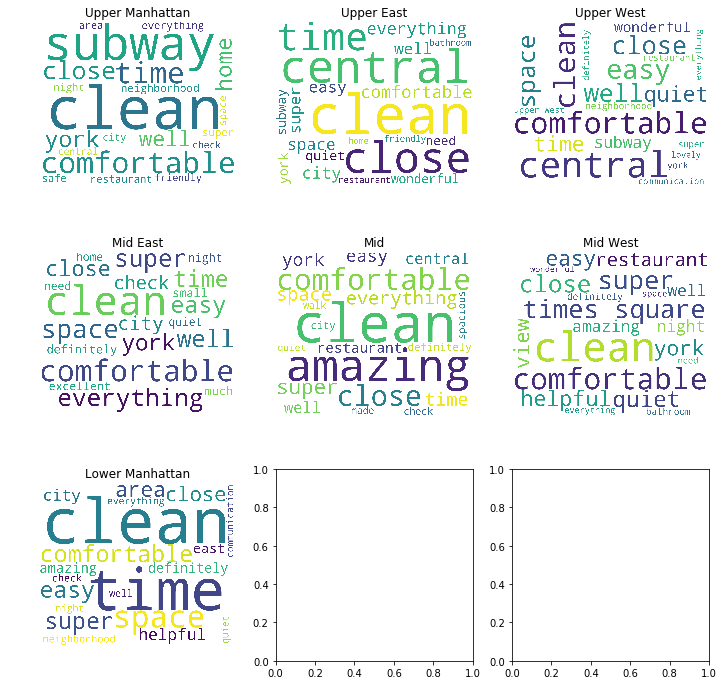

In [149]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

DELETE_WORDS = ['apartment', 'room', 'house', 'place', 'stay', 'host', 'great', 'good', 'nice', 'really', 'thank', 'location']
def remove_words(text_list, DELETE_WORDS = DELETE_WORDS):
    for word in DELETE_WORDS:
        for n, i in enumerate(text_list):
            if i == word:
                text_list[n] = ' '
    return text_list

MIN_LENGTH = 3
def remove_short_words(text_list, min_length = MIN_LENGTH):
    for n, i in enumerate(text_list):
        if len(i) <= min_length:
            text_list[n] = ' '
    return text_list

def remove_names(text_list):
    for word in name_list:
        for n, i in enumerate(text_list):
            if i == word:
                text_list[n] = ' '
    return text_list

COL_NUM = 3
ROW_NUM = 3
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

title_list = ['Upper Manhattan', 'Upper East', 'Upper West', 'Mid East', 'Mid', 'Mid West', 'Lower Manhattan']
for i in range(0,len(texts)):
    text = remove_words(texts[i])
    text = remove_short_words(text)
    text = remove_names(text)
    string = ' '.join(x for x in text)
    ax = axes[i//3, i%3] 
    ax.set_title(title_list[i])
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000,max_words=20).generate(string)
    ax.imshow(wordcloud)
    ax.axis('off')
plt.show()

<li>Overall, people are satisfied with Airbnb in Manhattan. 